# 1. Install YOLOv8 (Ultralytics)

In [1]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.1 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found existin

# 2. Import YOLOv8

In [2]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# 3. Load a Pre-trained YOLOv8 Model

In [3]:
# Load a YOLOv8 model
model = YOLO("yolov8n.pt")  # Load YOLOv8 nano, you can change the variant (e.g., yolov8s.pt)

100%|██████████| 6.25M/6.25M [00:00<00:00, 138MB/s]


#  copy or move your dataset from the Kaggle input directory to the working directory so it's writable and accessible during training.

In [6]:
import shutil

# Copy entire dataset directory
shutil.copytree('/kaggle/input/fruit-detector', '/kaggle/working/dataset/fruit-detector', dirs_exist_ok=True)


'/kaggle/working/dataset/fruit-detector'

# Create data.yaml

In [11]:
%%writefile data.yaml
path: /kaggle/working/dataset/fruit-detector
train: train/images
val: valid/images
test: test/images

names:
  0: cucumber
  1: apple
  2: kiwi
  3: banana
  4: orange
  5: coconut
  6: peach
  7: cherry
  8: pear
  9: pomegranate
  10: pineapple
  11: watermelon
  12: melon
  13: grape
  14: strawberry

Overwriting data.yaml


# Verify the structure

In [ ]:
import os

os.listdir('/kaggle/working/dataset/fruit-detector/train')  


['labels', 'images']

# 4. Set Hyperparameters for YOLOv8

In [16]:
model.train(
    data='data.yaml',
    epochs=50,
    imgsz=640,
    batch=16,
    lr0=0.01,         # Initial learning rate
    lrf=0.1,          # Final learning rate fraction
    momentum=0.937,
    weight_decay=0.0005,
    warmup_epochs=3,
    warmup_momentum=0.8,
    warmup_bias_lr=0.1,
    box=0.05,
    cls=0.5,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    degrees=0.0,
    translate=0.1,
    scale=0.5,
    shear=0.0,
    perspective=0.0,
    flipud=0.0,
    fliplr=0.5,
    mosaic=1.0,
    mixup=0.0
)


Ultralytics 8.3.124 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None

100%|██████████| 755k/755k [00:00<00:00, 29.6MB/s]


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 106MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1131.5±792.6 MB/s, size: 48.0 KB)


train: Scanning /kaggle/working/dataset/fruit-detector/train/labels... 1107 images, 50 backgrounds, 0 corrupt: 100%|██████████| 1157/1157 [00:00<00:00, 1313.07it/s]

train: New cache created: /kaggle/working/dataset/fruit-detector/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 355.8±166.0 MB/s, size: 84.0 KB)


val: Scanning /kaggle/working/dataset/fruit-detector/valid/labels... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<00:00, 1433.79it/s]

val: New cache created: /kaggle/working/dataset/fruit-detector/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.13G   0.005248      4.115      1.199         66        640:   3%|▎         | 2/73 [00:01<00:45,  1.57it/s]libpng warning: iCCP: known incorrect sRGB profile
       1/50      2.21G   0.005798      3.518      1.239         30        640: 100%|██████████| 73/73 [00:15<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]


                   all         50        123      0.543      0.221      0.369      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.46G     0.0062      2.572      1.247         90        640:  70%|██████▉   | 51/73 [00:09<00:04,  5.17it/s]libpng warning: iCCP: known incorrect sRGB profile
       2/50      2.46G   0.006198      2.503      1.245         69        640:  93%|█████████▎| 68/73 [00:12<00:00,  5.45it/s]libpng warning: iCCP: known incorrect sRGB profile
       2/50      2.46G   0.006181       2.48      1.246         17        640: 100%|██████████| 73/73 [00:13<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.33it/s]

                   all         50        123      0.647      0.633      0.699      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.46G   0.006026      1.905      1.226         12        640: 100%|██████████| 73/73 [00:13<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.49it/s]

                   all         50        123       0.72       0.82      0.868       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.46G   0.005936      1.748      1.215         64        640:  26%|██▌       | 19/73 [00:04<00:10,  4.99it/s]libpng warning: iCCP: known incorrect sRGB profile
       4/50      2.46G   0.005955      1.717      1.206         38        640: 100%|██████████| 73/73 [00:14<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.62it/s]

                   all         50        123      0.721      0.797       0.85      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.46G   0.005828       1.56      1.198         67        640:  77%|███████▋  | 56/73 [00:10<00:03,  5.37it/s]libpng warning: iCCP: known incorrect sRGB profile
       5/50      2.46G   0.005816      1.551      1.193         90        640:  90%|█████████ | 66/73 [00:12<00:01,  5.41it/s]libpng warning: iCCP: known incorrect sRGB profile
       5/50      2.46G   0.005812      1.543      1.193         21        640: 100%|██████████| 73/73 [00:13<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.11it/s]

                   all         50        123      0.902      0.756      0.927      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.46G   0.005691      1.437      1.181         34        640: 100%|██████████| 73/73 [00:13<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.33it/s]

                   all         50        123      0.857      0.907      0.928      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.46G    0.00562      1.378      1.152         81        640:  85%|████████▍ | 62/73 [00:11<00:01,  5.51it/s]libpng warning: iCCP: known incorrect sRGB profile
       7/50      2.46G   0.005595      1.372      1.151         24        640: 100%|██████████| 73/73 [00:13<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.64it/s]

                   all         50        123      0.932       0.85      0.938      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.46G   0.005643      1.291      1.151         89        640:   3%|▎         | 2/73 [00:00<00:14,  5.06it/s]libpng warning: iCCP: known incorrect sRGB profile
       8/50      2.46G   0.005634      1.278      1.159         24        640: 100%|██████████| 73/73 [00:14<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.46it/s]

                   all         50        123       0.87      0.902      0.953      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.46G   0.005384      1.248       1.15         74        640:  66%|██████▌   | 48/73 [00:09<00:04,  5.45it/s]libpng warning: iCCP: known incorrect sRGB profile
       9/50      2.46G   0.005457      1.239       1.15         27        640: 100%|██████████| 73/73 [00:13<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.53it/s]

                   all         50        123      0.852      0.911      0.953      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.46G   0.005375      1.191      1.159         96        640:  85%|████████▍ | 62/73 [00:12<00:02,  5.07it/s]libpng warning: iCCP: known incorrect sRGB profile
      10/50      2.46G   0.005417      1.192      1.158         33        640: 100%|██████████| 73/73 [00:14<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.24it/s]


                   all         50        123      0.915      0.938      0.961      0.752

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.46G   0.005326       1.14      1.121         88        640:  36%|███▌      | 26/73 [00:05<00:08,  5.46it/s]libpng warning: iCCP: known incorrect sRGB profile
      11/50      2.46G   0.005281      1.121      1.128         23        640: 100%|██████████| 73/73 [00:13<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.32it/s]

                   all         50        123      0.837      0.911      0.965       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.46G   0.005459      1.108      1.142        101        640:  56%|█████▌    | 41/73 [00:07<00:05,  5.53it/s]libpng warning: iCCP: known incorrect sRGB profile
      12/50      2.46G   0.005399      1.099      1.131         31        640: 100%|██████████| 73/73 [00:13<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.29it/s]

                   all         50        123      0.858       0.86      0.911      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.46G   0.005276      1.035      1.131        121        640:  85%|████████▍ | 62/73 [00:11<00:02,  5.30it/s]libpng warning: iCCP: known incorrect sRGB profile
      13/50      2.46G   0.005316      1.038      1.133         17        640: 100%|██████████| 73/73 [00:13<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         50        123       0.92      0.858      0.953       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.46G   0.005228     0.9822      1.142         67        640:  18%|█▊        | 13/73 [00:02<00:12,  4.89it/s]libpng warning: iCCP: known incorrect sRGB profile
      14/50      2.46G   0.005133      1.007      1.121         41        640: 100%|██████████| 73/73 [00:13<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.05it/s]

                   all         50        123      0.908      0.909      0.966      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.46G   0.005264      1.012      1.132         81        640:  81%|████████  | 59/73 [00:11<00:02,  5.42it/s]libpng warning: iCCP: known incorrect sRGB profile
      15/50      2.46G   0.005243      1.011      1.133         23        640: 100%|██████████| 73/73 [00:13<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.56it/s]

                   all         50        123      0.932      0.889      0.956      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.46G   0.005091     0.9774      1.104         88        640:  34%|███▍      | 25/73 [00:04<00:08,  5.48it/s]libpng warning: iCCP: known incorrect sRGB profile
      16/50      2.46G   0.005132     0.9746       1.11         32        640: 100%|██████████| 73/73 [00:13<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.47it/s]

                   all         50        123      0.895       0.92      0.973      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.46G   0.005082     0.9693      1.119         96        640:  86%|████████▋ | 63/73 [00:11<00:01,  5.58it/s]libpng warning: iCCP: known incorrect sRGB profile
      17/50      2.46G    0.00511     0.9743       1.12         13        640: 100%|██████████| 73/73 [00:13<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]

                   all         50        123       0.88      0.928      0.965      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.46G   0.005006     0.9293      1.095         60        640:  11%|█         | 8/73 [00:01<00:13,  4.87it/s]libpng warning: iCCP: known incorrect sRGB profile
      18/50      2.46G   0.005041     0.9226      1.103         27        640: 100%|██████████| 73/73 [00:13<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.51it/s]

                   all         50        123      0.873      0.928       0.97      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.46G   0.005326      1.011      1.135         62        640:  10%|▉         | 7/73 [00:01<00:13,  4.81it/s]libpng warning: iCCP: known incorrect sRGB profile
      19/50      2.46G   0.005077     0.9147      1.103         14        640: 100%|██████████| 73/73 [00:13<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.83it/s]

                   all         50        123      0.931      0.934      0.976      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.46G   0.004376      0.832      1.065         88        640:   1%|▏         | 1/73 [00:00<00:12,  5.82it/s]libpng warning: iCCP: known incorrect sRGB profile
      20/50      2.46G   0.004876     0.8751      1.089         18        640: 100%|██████████| 73/73 [00:13<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.13it/s]

                   all         50        123      0.841      0.917      0.938      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.46G   0.004944     0.8661      1.094         60        640:  48%|████▊     | 35/73 [00:06<00:07,  5.37it/s]libpng warning: iCCP: known incorrect sRGB profile
      21/50      2.46G   0.004867     0.8537      1.087         38        640: 100%|██████████| 73/73 [00:13<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.64it/s]

                   all         50        123      0.866      0.922      0.945      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.46G   0.004847     0.8357      1.108         66        640:  34%|███▍      | 25/73 [00:05<00:08,  5.39it/s]libpng warning: iCCP: known incorrect sRGB profile
      22/50      2.46G   0.004953     0.8567      1.102         24        640: 100%|██████████| 73/73 [00:13<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.39it/s]

                   all         50        123      0.926      0.914      0.964      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.46G   0.004825     0.8493      1.101         76        640:  14%|█▎        | 10/73 [00:01<00:12,  4.94it/s]libpng warning: iCCP: known incorrect sRGB profile
      23/50      2.46G   0.004906     0.8216      1.088         42        640: 100%|██████████| 73/73 [00:13<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.46it/s]

                   all         50        123      0.901      0.959      0.982      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.46G   0.004865     0.7764      1.084         86        640:  10%|▉         | 7/73 [00:01<00:12,  5.20it/s]libpng warning: iCCP: known incorrect sRGB profile
      24/50      2.46G   0.004915     0.8192       1.09         27        640: 100%|██████████| 73/73 [00:13<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.33it/s]

                   all         50        123      0.925      0.957      0.979      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.46G   0.004891     0.8065       1.09         73        640:  78%|███████▊  | 57/73 [00:10<00:02,  5.40it/s]libpng warning: iCCP: known incorrect sRGB profile
      25/50      2.46G    0.00488     0.8067      1.089         13        640: 100%|██████████| 73/73 [00:13<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]

                   all         50        123      0.924      0.943       0.98      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.46G   0.004666     0.7544      1.074        126        640:  60%|██████    | 44/73 [00:08<00:05,  5.18it/s]libpng warning: iCCP: known incorrect sRGB profile
      26/50      2.46G   0.004773     0.7575      1.084         38        640: 100%|██████████| 73/73 [00:13<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         50        123      0.894      0.959      0.967      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.46G   0.004982     0.7822        1.1         56        640:  49%|████▉     | 36/73 [00:06<00:06,  5.52it/s]libpng warning: iCCP: known incorrect sRGB profile
      27/50      2.46G   0.004911     0.7684      1.092         38        640: 100%|██████████| 73/73 [00:13<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.31it/s]

                   all         50        123      0.903      0.953      0.978      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.46G   0.004831     0.7451      1.078         64        640:  78%|███████▊  | 57/73 [00:10<00:02,  5.48it/s]libpng warning: iCCP: known incorrect sRGB profile
      28/50      2.46G   0.004891      0.761      1.084         27        640: 100%|██████████| 73/73 [00:13<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.32it/s]

                   all         50        123      0.942      0.949      0.975      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.46G   0.004585     0.7098      1.055         72        640:  55%|█████▍    | 40/73 [00:07<00:05,  5.66it/s]libpng warning: iCCP: known incorrect sRGB profile
      29/50      2.46G   0.004662     0.7214      1.065         20        640: 100%|██████████| 73/73 [00:13<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         50        123      0.941      0.935      0.982       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.46G   0.004736      0.698      1.068         99        640:  12%|█▏        | 9/73 [00:01<00:12,  5.03it/s]libpng warning: iCCP: known incorrect sRGB profile
      30/50      2.46G   0.004639     0.7121       1.07         23        640: 100%|██████████| 73/73 [00:13<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.93it/s]

                   all         50        123       0.92      0.937      0.965      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.46G   0.004794      0.728      1.081         50        640:  10%|▉         | 7/73 [00:01<00:16,  4.05it/s]libpng warning: iCCP: known incorrect sRGB profile
      31/50      2.46G   0.004706     0.6996      1.068         17        640: 100%|██████████| 73/73 [00:14<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.50it/s]

                   all         50        123      0.885      0.945       0.97      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.46G   0.004728     0.6968      1.067         82        640:  48%|████▊     | 35/73 [00:06<00:07,  5.35it/s]libpng warning: iCCP: known incorrect sRGB profile
      32/50      2.46G   0.004648     0.6896      1.058         25        640: 100%|██████████| 73/73 [00:13<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.75it/s]

                   all         50        123      0.935      0.928      0.975      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.46G   0.004576     0.6702      1.067         61        640:  66%|██████▌   | 48/73 [00:09<00:04,  5.51it/s]libpng warning: iCCP: known incorrect sRGB profile
      33/50      2.46G   0.004626     0.6678      1.066         37        640: 100%|██████████| 73/73 [00:13<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.40it/s]

                   all         50        123      0.947      0.953      0.984      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.46G   0.004458       0.64      1.042         99        640:  70%|██████▉   | 51/73 [00:09<00:03,  5.57it/s]libpng warning: iCCP: known incorrect sRGB profile
      34/50      2.46G   0.004475     0.6402      1.048         24        640: 100%|██████████| 73/73 [00:13<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         50        123       0.94      0.943      0.975      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.46G   0.004563     0.6552      1.053        101        640:  47%|████▋     | 34/73 [00:06<00:07,  5.45it/s]libpng warning: iCCP: known incorrect sRGB profile
      35/50      2.46G    0.00454     0.6682      1.056         17        640: 100%|██████████| 73/73 [00:13<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         50        123      0.922      0.955      0.984      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.46G   0.004474      0.675      1.058         84        640:  51%|█████     | 37/73 [00:06<00:06,  5.53it/s]libpng warning: iCCP: known incorrect sRGB profile
      36/50      2.46G   0.004502     0.6736      1.056         20        640: 100%|██████████| 73/73 [00:13<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.90it/s]

                   all         50        123      0.935      0.952      0.982      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.46G   0.004469      0.632      1.041         85        640:  48%|████▊     | 35/73 [00:06<00:06,  5.49it/s]libpng warning: iCCP: known incorrect sRGB profile
      37/50      2.46G   0.004454     0.6295       1.04         81        640:  97%|█████████▋| 71/73 [00:13<00:00,  5.33it/s]libpng warning: iCCP: known incorrect sRGB profile
      37/50      2.46G   0.004455      0.632       1.04         36        640: 100%|██████████| 73/73 [00:13<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.89it/s]

                   all         50        123      0.954      0.946      0.986      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.46G    0.00433     0.6104      1.035         28        640: 100%|██████████| 73/73 [00:13<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.00it/s]

                   all         50        123      0.933      0.958      0.984      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.46G   0.004388     0.5842      1.049         90        640:  12%|█▏        | 9/73 [00:01<00:12,  5.12it/s]libpng warning: iCCP: known incorrect sRGB profile
      39/50      2.46G   0.004409     0.6236      1.043         22        640: 100%|██████████| 73/73 [00:13<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.01it/s]

                   all         50        123      0.923      0.965      0.985      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.46G   0.004412     0.6196      1.048         63        640:  40%|███▉      | 29/73 [00:05<00:08,  5.39it/s]libpng warning: iCCP: known incorrect sRGB profile
      40/50      2.46G   0.004477     0.6294      1.052         18        640: 100%|██████████| 73/73 [00:13<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.07it/s]

                   all         50        123      0.917      0.969      0.982      0.823


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.46G   0.003886     0.5998     0.9883         50        640:  68%|██████▊   | 50/73 [00:10<00:04,  5.52it/s]libpng warning: iCCP: known incorrect sRGB profile
      41/50      2.46G     0.0039     0.5933     0.9849         15        640: 100%|██████████| 73/73 [00:14<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         50        123      0.913      0.965      0.979      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.46G   0.003761     0.5647     0.9641         12        640: 100%|██████████| 73/73 [00:13<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.47it/s]

                   all         50        123      0.913      0.956      0.983      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.46G   0.003895     0.5635     0.9708         28        640:  30%|███       | 22/73 [00:04<00:09,  5.48it/s]libpng warning: iCCP: known incorrect sRGB profile
      43/50      2.46G   0.003735      0.541     0.9663         41        640:  99%|█████████▊| 72/73 [00:13<00:00,  5.51it/s]libpng warning: iCCP: known incorrect sRGB profile
      43/50      2.46G    0.00374     0.5428     0.9699         10        640: 100%|██████████| 73/73 [00:13<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.88it/s]

                   all         50        123      0.949      0.953      0.978      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.46G   0.003722     0.5187     0.9601          6        640: 100%|██████████| 73/73 [00:13<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]

                   all         50        123      0.951      0.947      0.977      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.46G   0.003666     0.5166     0.9598         29        640:  84%|████████▎ | 61/73 [00:11<00:02,  5.42it/s]libpng warning: iCCP: known incorrect sRGB profile
      45/50      2.46G   0.003701     0.5146     0.9623         13        640: 100%|██████████| 73/73 [00:13<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.39it/s]

                   all         50        123      0.958      0.943      0.986      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.46G   0.003855     0.4981     0.9689         34        640:  25%|██▍       | 18/73 [00:03<00:10,  5.31it/s]libpng warning: iCCP: known incorrect sRGB profile
      46/50      2.46G   0.003725     0.5089     0.9637         13        640: 100%|██████████| 73/73 [00:13<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.89it/s]

                   all         50        123      0.949      0.952      0.984      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.46G   0.003571     0.4777     0.9557         40        640:  53%|█████▎    | 39/73 [00:07<00:06,  5.42it/s]libpng warning: iCCP: known incorrect sRGB profile
      47/50      2.46G   0.003638     0.4904     0.9615         16        640: 100%|██████████| 73/73 [00:13<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.26it/s]

                   all         50        123       0.95      0.955      0.987      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.46G   0.003495     0.4793     0.9595         36        640:  64%|██████▍   | 47/73 [00:08<00:04,  5.59it/s]libpng warning: iCCP: known incorrect sRGB profile
      48/50      2.46G   0.003603     0.4831     0.9637          9        640: 100%|██████████| 73/73 [00:13<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.03it/s]

                   all         50        123      0.949      0.977       0.98      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.46G    0.00362     0.4765     0.9526         40        640:  90%|█████████ | 66/73 [00:12<00:01,  5.56it/s]libpng warning: iCCP: known incorrect sRGB profile
      49/50      2.46G   0.003582     0.4743     0.9499         13        640: 100%|██████████| 73/73 [00:13<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         50        123      0.949      0.974      0.986      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.46G   0.003553     0.4698     0.9471         12        640: 100%|██████████| 73/73 [00:13<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.36it/s]

                   all         50        123      0.951      0.971      0.982      0.829



50 epochs completed in 0.200 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.3MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.124 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.09it/s]


                   all         50        123      0.951      0.955      0.987      0.843
              cucumber          3         20          1      0.866      0.949       0.65
                 apple          3         16      0.992          1      0.995      0.905
                  kiwi          3         15      0.968        0.8      0.947      0.816
                banana          3          3      0.969          1      0.995      0.831
                orange          3          6      0.846          1      0.995      0.918
               coconut          3          6      0.933          1      0.995      0.818
                 peach          3         11      0.914          1      0.972       0.88
                cherry          4          6      0.972          1      0.995      0.888
                  pear          4          6       0.98          1      0.995      0.761
           pomegranate          4          5      0.997          1      0.995      0.784
             pineappl

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 1.9ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b45004f8c50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,   

# Use the Trained Model for Prediction

In [ ]:
from ultralytics import YOLO

model = YOLO("/kaggle/working/runs/detect/train2/weights/best.pt")

results = model.predict(source="dataset/fruit-detector/test/images", imgsz=640, conf=0.25, save=True)


image 1/30 /kaggle/working/dataset/fruit-detector/test/images/1.jpg: 448x640 5 cucumbers, 34.9ms
image 2/30 /kaggle/working/dataset/fruit-detector/test/images/10.jpg: 512x640 1 orange, 34.6ms
image 3/30 /kaggle/working/dataset/fruit-detector/test/images/11.jpg: 640x448 2 coconuts, 33.4ms
image 4/30 /kaggle/working/dataset/fruit-detector/test/images/12.jpg: 448x640 2 coconuts, 7.1ms
image 5/30 /kaggle/working/dataset/fruit-detector/test/images/13.jpg: 640x448 4 peachs, 6.5ms
image 6/30 /kaggle/working/dataset/fruit-detector/test/images/14.jpg: 640x448 1 peach, 5.9ms
image 7/30 /kaggle/working/dataset/fruit-detector/test/images/15.jpg: 448x640 1 cherry, 6.4ms
image 8/30 /kaggle/working/dataset/fruit-detector/test/images/16.jpg: 640x640 22 cherrys, 6.4ms
image 9/30 /kaggle/working/dataset/fruit-detector/test/images/17.jpg: 448x640 2 pears, 6.6ms
image 10/30 /kaggle/working/dataset/fruit-detector/test/images/18.jpg: 640x640 5 kiwis, 4 pears, 6.3ms
image 11/30 /kaggle/working/dataset/fruit

#  Visualize Predictions ,  results object from the prediction 

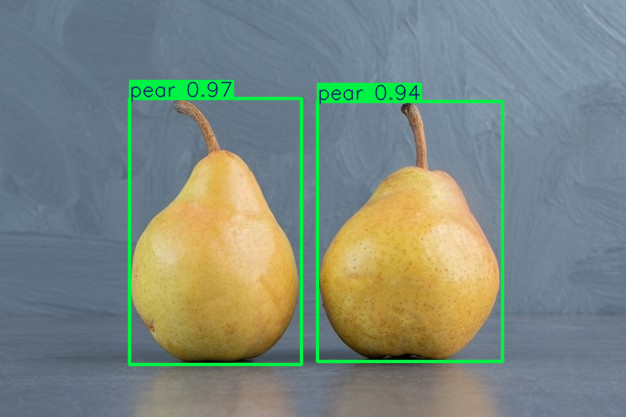

In [ ]:
# After running `results = model.predict(...)`
# Show the first prediction result inline:
results[8].show()

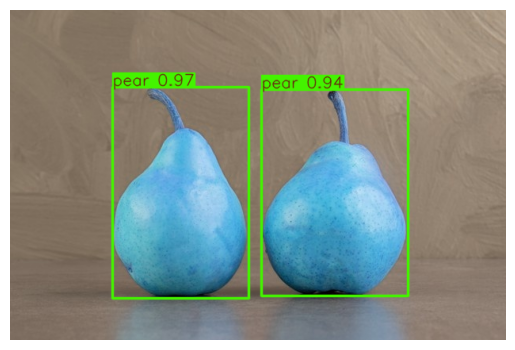

In [ ]:
rendered = results[8].plot()  
plt.imshow(rendered)
plt.axis("off")
plt.show()

#  Zip folder

In [ ]:
import shutil

folder_path = "/kaggle/working/dataset/fruit-detector"
zip_file_path = "/kaggle/working/fruit-detector.zip"
shutil.make_archive(zip_file_path.replace('.zip', ''), 'zip', folder_path)


'/kaggle/working/fruit-detector.zip'

# Model Summary

In [31]:
model = YOLO("/kaggle/working/runs/detect/train2/weights/best.pt")  
model.info()

Model summary: 129 layers, 3,013,773 parameters, 0 gradients, 8.2 GFLOPs


(129, 3013773, 0, 8.2092032)

In [ ]:
model = YOLO("/kaggle/working/yolov8n.pt")
model.info()

YOLOv8n summary: 129 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs


(129, 3157200, 0, 8.8575488)

In [34]:
model = YOLO("/kaggle/working/yolo11n.pt")
model.info()

YOLO11n summary: 181 layers, 2,624,080 parameters, 0 gradients, 6.6 GFLOPs


(181, 2624080, 0, 6.614336)

# Inspecting & Modifying the Architecture

In [ ]:
model = YOLO('yolov8n.yaml')  
model.info() 

YOLOv8n summary: 129 layers, 3,157,200 parameters, 3,157,184 gradients, 8.9 GFLOPs


(129, 3157200, 3157184, 8.8575488)

# Training & Validation Loss Plots

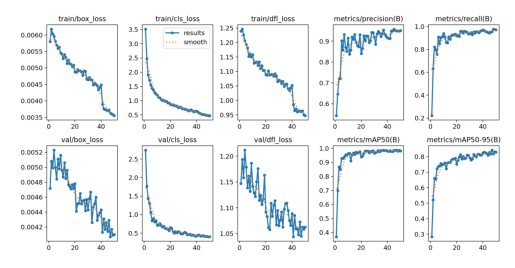

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/kaggle/working/runs/detect/train2/results.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
print("Mean Average Precision (mAP@0.5):", results.box.map)          
print("Mean Average Precision (mAP@0.5:0.95):", results.box.map75)   
print("Precision:", results.box.p)                                    
print("Recall:", results.box.r)                                 


Mean Average Precision (mAP@0.5): 0.8445993070342532
Mean Average Precision (mAP@0.5:0.95): 0.9379800804758109
Precision: [          1     0.99103     0.96443     0.99647     0.84485     0.92938     0.91236     0.97038     0.97863     0.99504     0.98761     0.91602     0.73356           1           1]
Recall: [    0.86918           1         0.8           1           1           1           1           1           1           1           1           1           1     0.76372      0.9652]
